In [71]:
#from google.colab import drive
#drive.mount('/content/drive')
!pip install sweetviz > "/dev/null 2>&1
!pip install missingno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sweetviz as sv
import statsmodels.graphics.correlation as sgc
from statsmodels.graphics.gofplots import qqplot
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import OLSInfluence

The system cannot find the path specified.


In [3]:
df = pd.read_csv('co2_emissions_from_agri.csv')
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [4]:
print(f'Name of Columns is: \n {df.columns}')

Name of Columns is: 
 Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [6]:
print(f'Is there missing data in the columns?\n{df.isna().any()}')

Is there missing data in the columns?
Area                               False
Year                               False
Savanna fires                       True
Forest fires                        True
Crop Residues                       True
Rice Cultivation                   False
Drained organic soils (CO2)        False
Pesticides Manufacturing           False
Food Transport                     False
Forestland                          True
Net Forest conversion               True
Food Household Consumption          True
Food Retail                        False
On-farm Electricity Use            False
Food Packaging                     False
Agrifood Systems Waste Disposal    False
Food Processing                    False
Fertilizers Manufacturing          False
IPPU                                True
Manure applied to Soils             True
Manure left on Pasture             False
Manure Management                   True
Fires in organic soils             False
Fires in humid trop

In [7]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [8]:
df.shape

(6965, 31)

In [ ]:
df.drop(['Savanna fires','Fires in organic soils','Fires in humid tropical forests','Drained organic soils (CO2)','Crop Residuals','IPPU','Manure applied to Soils','Manure Management','On-farm energy use'], 
                axis = 1, inplace = True)
df.dropna(axis = 0, how = 'any', inplace = True)
df.shape

In [9]:
# Count rows and columns with missing values
missing_rows = df.isnull().any(axis = 1).sum()
missing_columns = df.isnull().sum()
columns_with_missing_values = missing_columns[missing_columns > 0].count()
print(f"\nNumber of rows with missing values: {missing_rows}")
print(f"Number of columns with missing values: {columns_with_missing_values}")


Number of rows with missing values: 2419
Number of columns with missing values: 11


In [10]:
print(f"\nNumber of rows percentage: {missing_rows/df.shape[0]*100}")
print(f"\nNumber of columns percentage: {columns_with_missing_values/df.shape[1]*100}")


Number of rows percentage: 34.7307968413496

Number of columns percentage: 35.483870967741936


In [ ]:
import sweetviz as sv
# Generate a report
report = sv.analyze(df)

# Show the report
report.show_html('report.html')

In [12]:
# Check for null values again
df.isna().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
T

In [13]:
print(f'Are there duplicate rows in the columns?\n{df.duplicated().any()}')

Are there duplicate rows in the columns?
False


In [14]:
df_before = df.copy()
df = df[(df['Fertilizers Manufacturing'] - df['Fertilizers Manufacturing'].mean()).abs() <= 3 * df['Fertilizers Manufacturing'].std()]
print("\nAfter removing outliers:")

print("\nNumber of outliers removed:", len(df_before) - len(df))


After removing outliers:

Number of outliers removed: 66


In [15]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [16]:
df.shape

(6899, 31)

In [75]:
df.set_index('Area', inplace = True)

# Exploratory Data Analysis

In [87]:
import statsmodels.formula.api as sm

# Separate data into independent (X) and independent (y) variables
y_name = 'total_emission'

X_names = list(df.columns)
X_names.remove(y_name)

X_data = df[X_names]
y_data = df[y_name]

In [88]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns = X_data.columns)

In [89]:
df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6899.000000,6.899000e+03,...,6899.000000,6899.000000,6899.000000,6899.000000,6.899000e+03,6.899000e+03,6.899000e+03,6.899000e+03,6.899000e+03,6899.000000
mean,2005.126395,1193.247962,917.278097,757.070554,2958.567879,3449.161430,240.671127,1720.322924,-13579.200605,1.775188e+04,...,1693.916321,1221.894141,674.830904,2024.418955,1.128809e+07,1.174089e+07,1.167230e+07,1.162971e+07,4.782627e+04,0.871408
std,8.890345,5257.182215,3710.702896,2154.426343,11069.381717,15764.689391,1022.381708,5089.627481,64291.289615,9.796096e+04,...,4538.967813,22777.731416,3243.087020,5100.178825,5.565380e+07,3.372762e+07,4.369847e+07,4.146084e+07,1.350645e+05,0.555913
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,24.586600,176.400000,0.000000,6.000000,26.956400,-5084.460300,0.000000e+00,...,50.879700,0.000000,0.000000,17.473100,9.431400e+04,2.095925e+05,1.977675e+05,2.048570e+05,5.165518e+03,0.509583
50%,2005.000000,1.580900,0.521200,188.977500,510.815200,0.000000,12.700401,196.038600,-116.750900,1.469274e+02,...,414.701200,0.000000,0.000000,273.267600,1.531666e+06,2.305017e+06,2.411119e+06,2.384874e+06,1.202242e+04,0.832167
75%,2013.000000,101.443500,67.124100,998.706309,1463.391166,656.963800,107.320450,1152.307500,0.000000,1.029570e+04,...,2263.344946,0.000000,21.887600,3008.982252,7.849661e+06,7.911613e+06,8.610548e+06,8.698770e+06,3.341986e+04,1.205833
max,2020.000000,114616.401100,52227.630600,29390.727100,134593.982400,241025.069600,15751.000000,67945.765000,171121.076000,1.605106e+06,...,55231.796100,991717.543100,51771.256800,65677.229500,9.000991e+08,4.830986e+08,7.209974e+08,6.753897e+08,1.732859e+06,3.496250


In [90]:
# Create correlation matrix 
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

print("\nCorrelation matrix of the variables:")
correlation_matrix


Correlation matrix of the variables:


,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
Year,1.000000,-0.011552,-0.007946,0.033117,0.006337,0.007045,0.025775,0.052863,0.020359,-0.023038,...,0.005291,-0.004077,-0.002659,-0.016936,0.014251,0.055606,0.031440,0.032619,0.025567,0.545243
Savanna fires,-0.011552,1.000000,0.506663,0.055869,-0.028997,0.013352,0.099512,0.081793,-0.077113,0.225571,...,0.058482,-0.004655,0.448381,0.061158,0.019468,0.065230,0.035791,0.040204,0.237259,-0.047150
Forest fires,-0.007946,0.506663,1.000000,0.115538,0.115643,0.104451,0.075343,0.076756,-0.181537,0.419397,...,0.101736,0.126971,0.942540,0.095683,0.125577,0.168309,0.145515,0.152760,0.408837,-0.038603
Crop Residues,0.033117,0.055869,0.115538,1.000000,0.585880,0.304340,0.779460,0.765448,-0.591938,0.204005,...,0.936566,0.075125,0.043653,0.775231,0.644699,0.875416,0.767130,0.780980,0.623818,-0.004159
Rice Cultivation,0.006337,-0.028997,0.115643,0.585880,1.000000,0.379778,0.162685,0.236618,-0.194087,0.123272,...,0.512084,0.298042,0.075728,0.270830,0.855245,0.674549,0.835067,0.831236,0.484576,-0.057776
Drained organic soils (CO2),0.007045,0.013352,0.104451,0.304340,0.379778,1.000000,0.223844,0.326465,-0.379240,0.217454,...,0.323629,0.661593,0.079674,0.308134,0.163808,0.344410,0.236345,0.252122,0.491945,0.025986
Pesticides Manufacturing,0.025775,0.099512,0.075343,0.779460,0.162685,0.223844,1.000000,0.827119,-0.579982,0.229335,...,0.771479,-0.000089,0.035777,0.815185,0.176552,0.625752,0.353670,0.375989,0.530797,0.013634
Food Transport,0.052863,0.081793,0.076756,0.765448,0.236618,0.326465,0.827119,1.000000,-0.622570,0.210842,...,0.803728,0.057551,0.018357,0.882726,0.248559,0.758272,0.452714,0.478286,0.601817,0.065177
Forestland,0.020359,-0.077113,-0.181537,-0.591938,-0.194087,-0.379240,-0.579982,-0.622570,1.000000,-0.453192,...,-0.597284,-0.142361,-0.107061,-0.654791,-0.179656,-0.558150,-0.326315,-0.353554,-0.428000,-0.031773
Net Forest conversion,-0.023038,0.225571,0.419397,0.204005,0.123272,0.217454,0.229335,0.210842,-0.453192,1.000000,...,0.147994,0.195783,0.457793,0.217241,0.074249,0.299986,0.162339,0.173979,0.751183,-0.030774


In [91]:
# Calculate correlations between predictor variables and the response variable
corrs = df.corr()['total_emission'].sort_values(ascending = False)
corrs

total_emission                     1.000000
Net Forest conversion              0.751183
Agrifood Systems Waste Disposal    0.748808
Urban population                   0.722612
Manure left on Pasture             0.710852
Manure applied to Soils            0.652232
Crop Residues                      0.623818
Food Transport                     0.601817
Manure Management                  0.585766
Total Population - Female          0.582307
Total Population - Male            0.568180
Food Household Consumption         0.548475
On-farm energy use                 0.547730
Pesticides Manufacturing           0.530797
Food Retail                        0.508865
IPPU                               0.495967
Drained organic soils (CO2)        0.491945
Rice Cultivation                   0.484576
Food Packaging                     0.444827
Rural population                   0.436189
Fires in humid tropical forests    0.411638
Forest fires                       0.408837
Fires in organic soils          

In [92]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col != 'total_emission']

for col in column_titles:
    p_val = round(pearsonr(df[col], df['total_emission'])[1], 6)
    dict_cp[col] = {'Correlation_Coefficient': corrs[col],
                    'P_Value': p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value'] < 0.1]

,Correlation_Coefficient,P_Value
Net Forest conversion,0.751183,0.000000
Savanna fires,0.237259,0.000000
Fertilizers Manufacturing,0.325118,0.000000
Food Processing,0.391409,0.000000
On-farm Electricity Use,0.391463,0.000000
Fires in organic soils,0.403191,0.000000
Forest fires,0.408837,0.000000
Fires in humid tropical forests,0.411638,0.000000
Rural population,0.436189,0.000000
Food Packaging,0.444827,0.000000


All variables appear to have a significant correlation with the dependent variable - since all P-values are less than the significance level of 5%

In [80]:
# sns.pairplot(df, diag_kind = 'kde')
# plt.show()

## EDA for key features

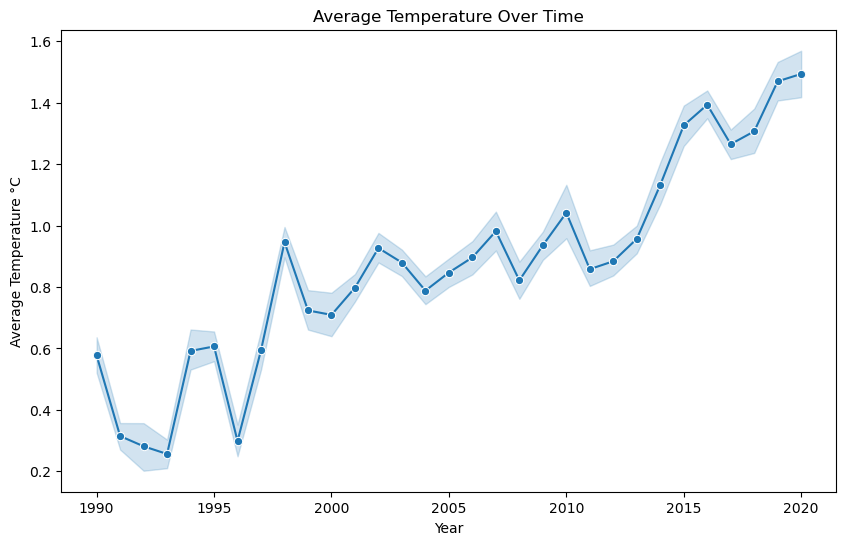

In [83]:
# Line plot for average temperature over time
plt.figure(figsize = (10, 6))
sns.lineplot(data = df, x = 'Year', y = 'Average Temperature °C', marker = 'o')
plt.title('Average Temperature Over Time')
plt.show()

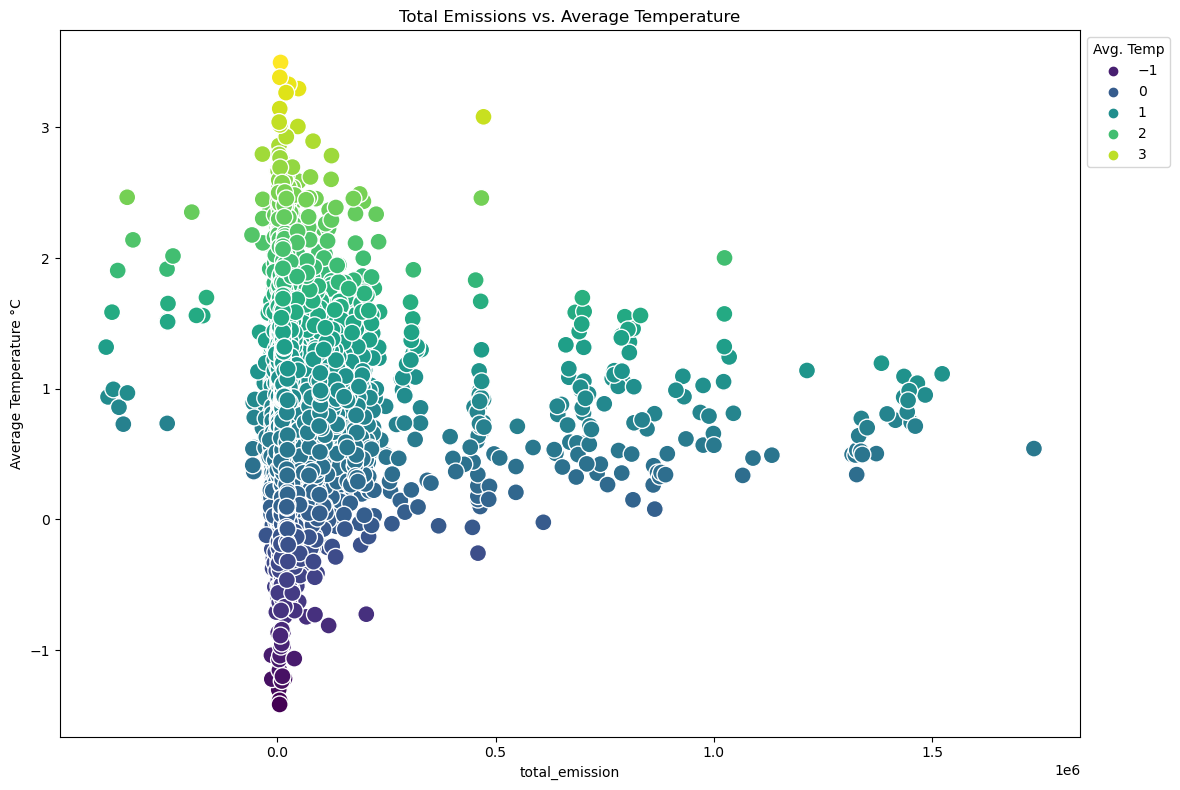

In [84]:
# Scatter plot for emissions vs. temperature
plt.figure(figsize = (14, 8))
sns.scatterplot(data = df, x = 'total_emission', y = 'Average Temperature °C', hue = 'Average Temperature °C', 
                palette = 'viridis', s = 150)
plt.title('Total Emissions vs. Average Temperature')
# plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), title = 'Area')
# Adjust the layout to make room for the legend
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1), title = 'Avg. Temp')
plt.tight_layout(rect = [0, 0, 0.85, 1])
plt.show()

The highest emissions appear to be when temperatures are a bit lower 

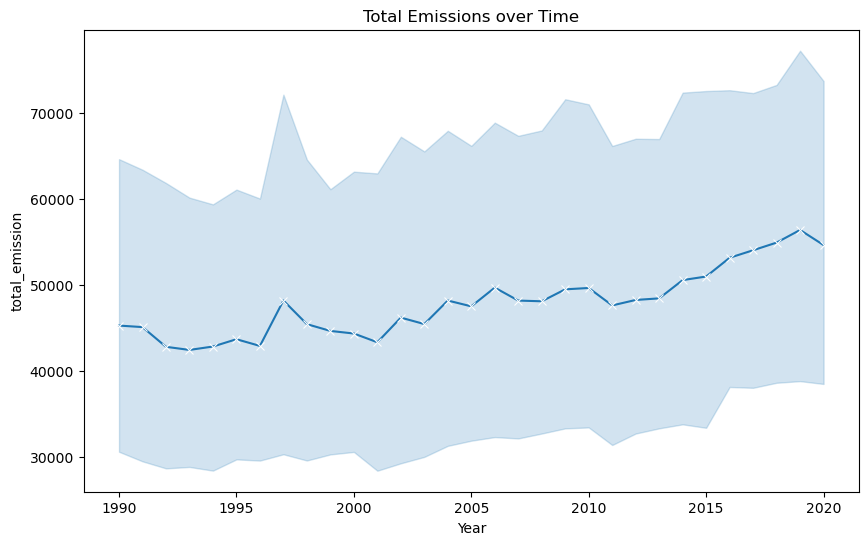

In [85]:
# Line plot for Total Emissions over Time
plt.figure(figsize = (10, 6))
sns.lineplot(data = df, x = 'Year', y = 'total_emission', marker = 'x')
plt.title('Total Emissions over Time')
plt.show()

#### Histograms for Distribution

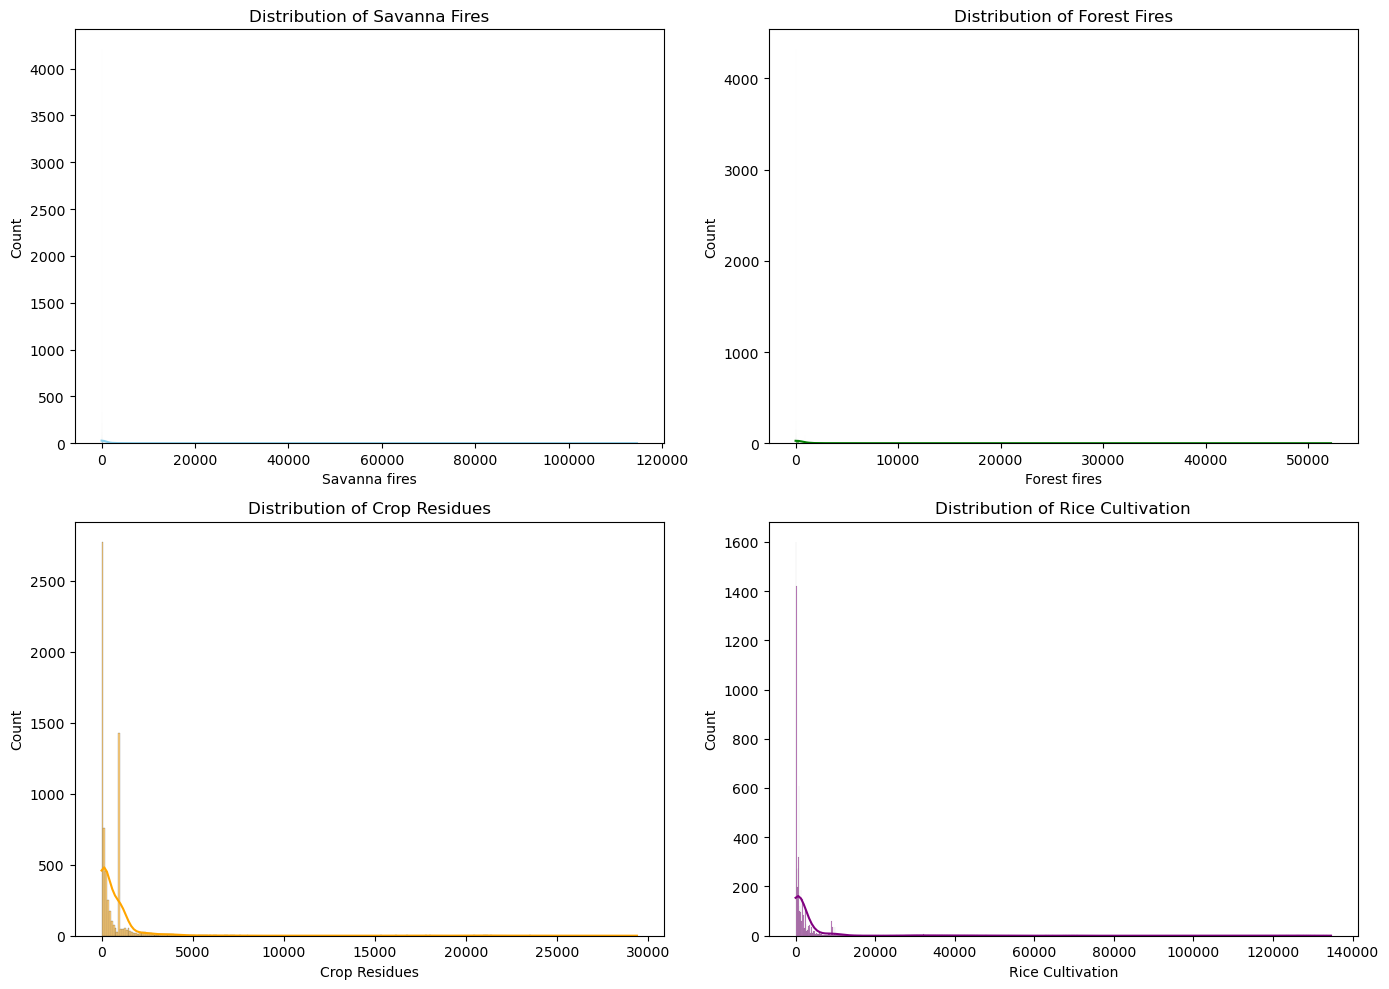

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (14, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Savanna fires'], kde = True, color = 'skyblue')
plt.title('Distribution of Savanna Fires')

plt.subplot(2, 2, 2)
sns.histplot(df['Forest fires'], kde = True, color = 'green')
plt.title('Distribution of Forest Fires')

plt.subplot(2, 2, 3)
sns.histplot(df['Crop Residues'], kde = True, color = 'orange')
plt.title('Distribution of Crop Residues')

plt.subplot(2, 2, 4)
sns.histplot(df['Rice Cultivation'], kde = True, color = 'purple')
plt.title('Distribution of Rice Cultivation')

plt.tight_layout()
plt.show()

#### Box plots help identify outliers

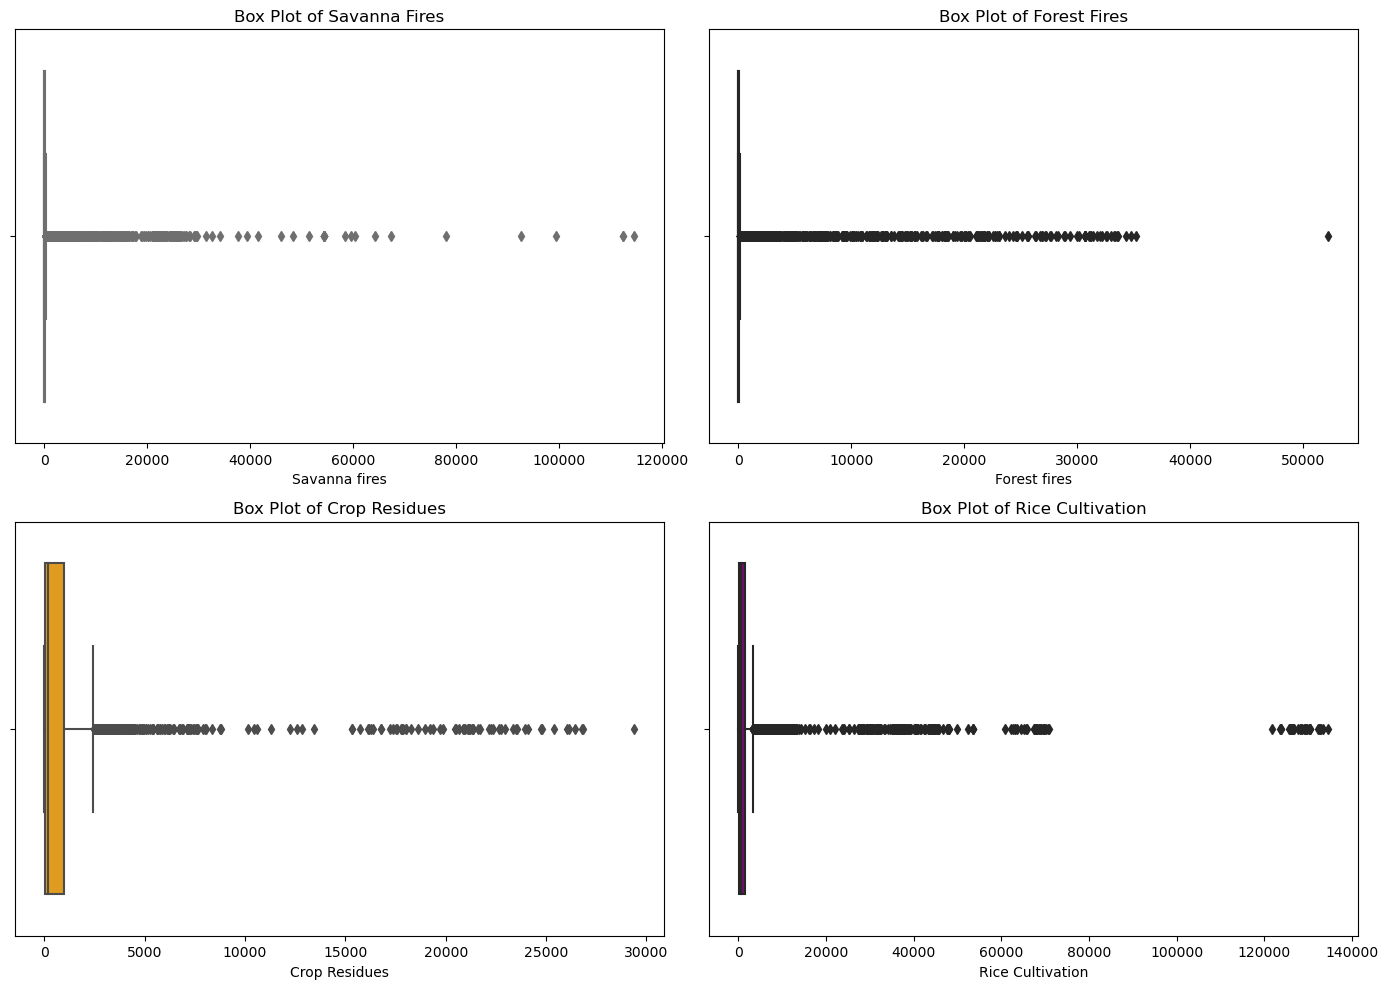

In [50]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x = df['Savanna fires'], color = 'skyblue')
plt.title('Box Plot of Savanna Fires')

plt.subplot(2, 2, 2)
sns.boxplot(x = df['Forest fires'], color = 'green')
plt.title('Box Plot of Forest Fires')

plt.subplot(2, 2, 3)
sns.boxplot(x = df['Crop Residues'], color = 'orange')
plt.title('Box Plot of Crop Residues')

plt.subplot(2, 2, 4)
sns.boxplot(x = df['Rice Cultivation'], color = 'purple')
plt.title('Box Plot of Rice Cultivation')

plt.tight_layout()
plt.show()

#### Pair plots show relationships between pairs of features.

C:\Users\dylan\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\dylan\anaconda3\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because n

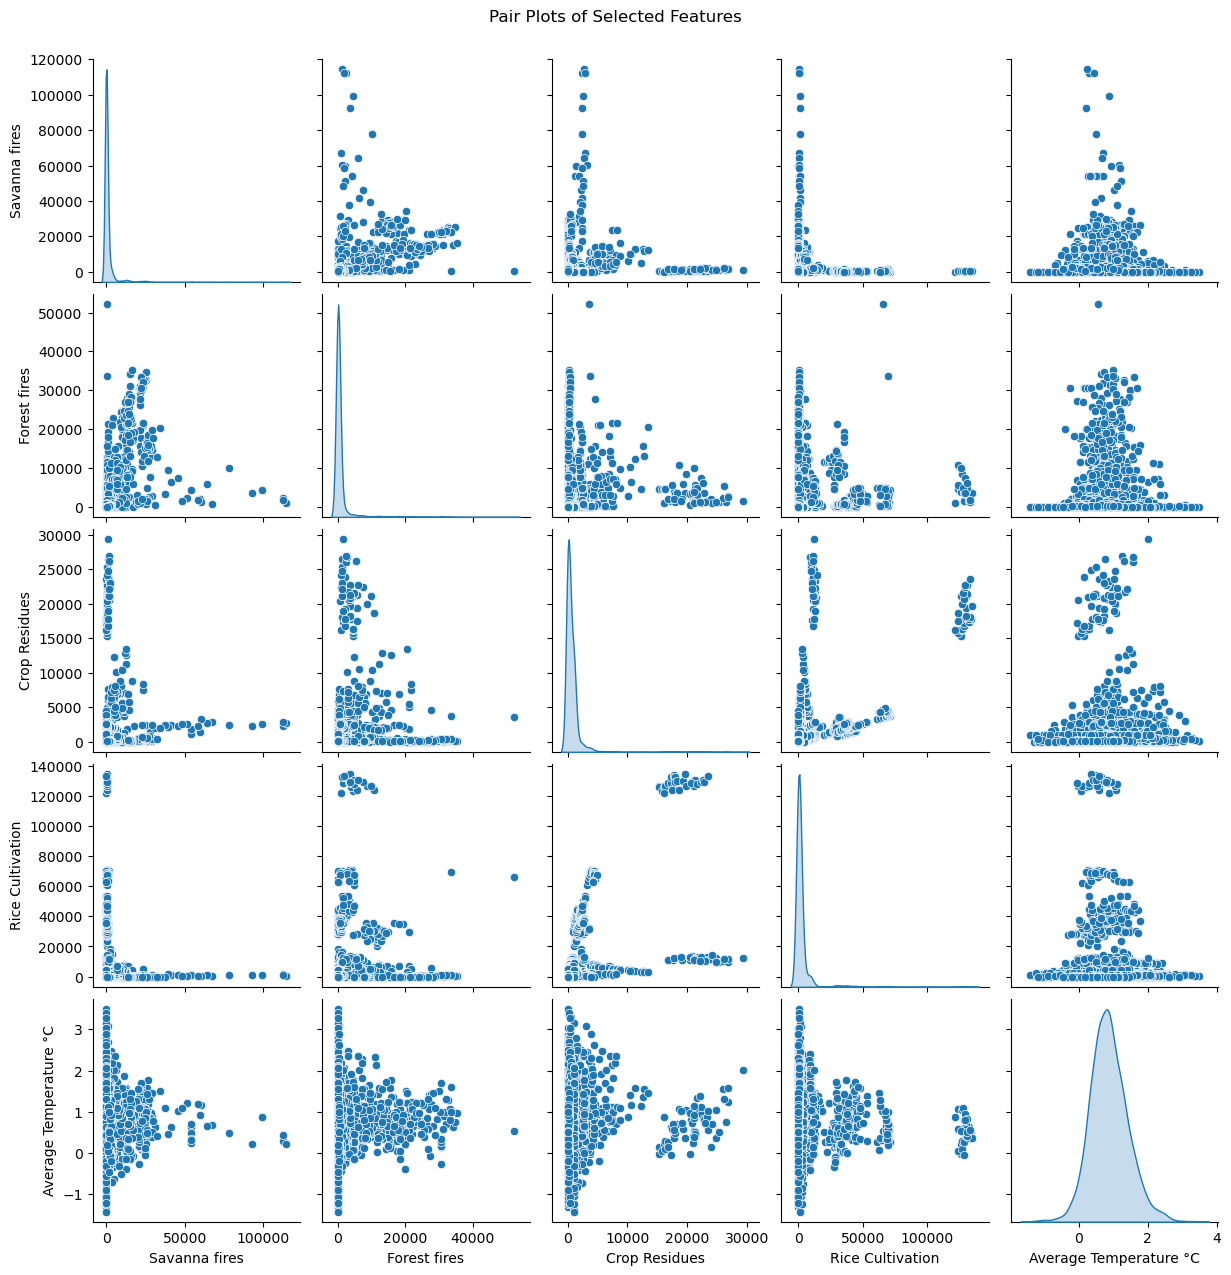

In [51]:
sns.pairplot(df[['Savanna fires', 'Forest fires', 'Crop Residues', 'Rice Cultivation', 'Average Temperature °C']], 
             diag_kind = 'kde', palette = 'coolwarm')
plt.suptitle('Pair Plots of Selected Features', y = 1.02)
plt.show()

#### A heatmap provides a visual representation of correlations between features.

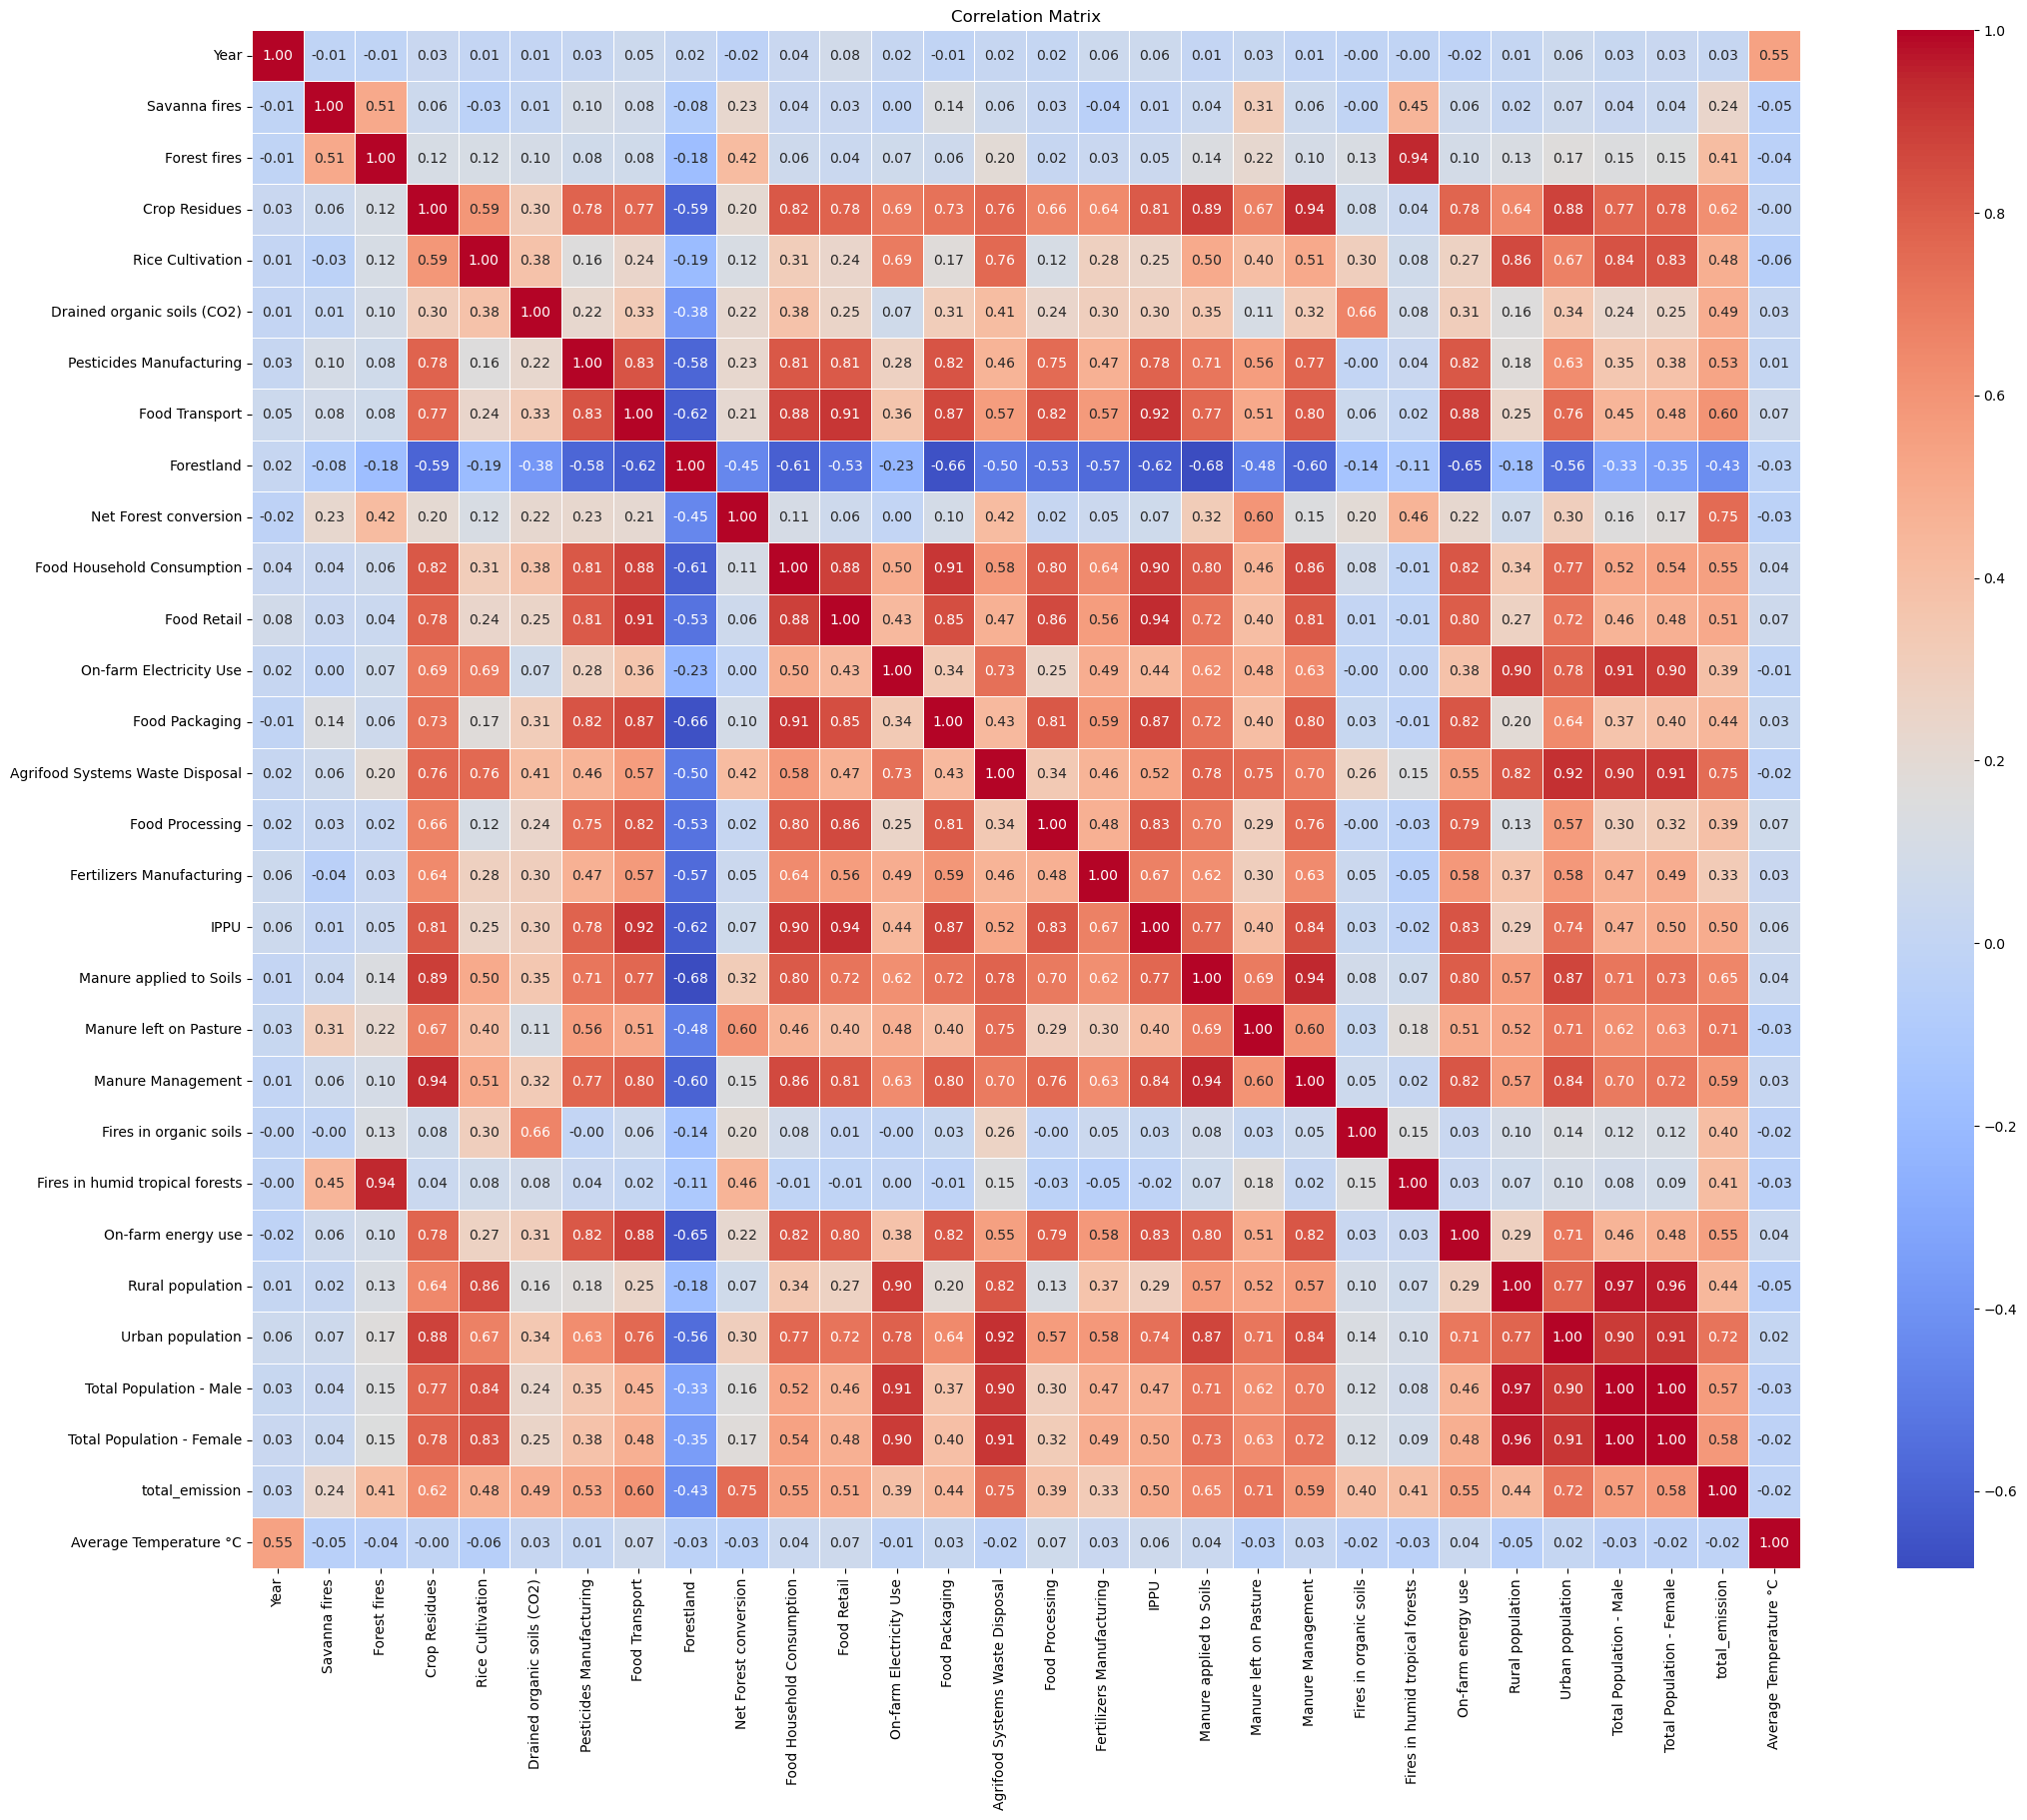

In [52]:
# Select only numerical columns for correlation matrix
numeric_df = df.select_dtypes(include = [np.number])

# Correlation matrix and heatmap
corr_matrix = numeric_df.corr()
plt.figure(figsize = (25, 20))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5, linecolor = 'white')
plt.title('Correlation Matrix')
plt.show()

# Modelling

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
# import xgboost as xgb

# Feature Engineering

In [ ]:
df.drop(['Rural Population','Total Population - Female'], axis = 1, inplace = True)

## Preprocess the Data

In [56]:
# Select features and target
features = df.drop(columns=['Average Temperature °C'])
target = df['Average Temperature °C']

# Convert categorical features to numerical
features = pd.get_dummies(features, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

## Train Models

### Linear Regression

In [57]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

### Decision Tree

In [58]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state = 42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

### Random Forest

In [59]:
# Random Forest
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

## Regularization

### Lasso Regression

In [60]:
# Lasso Regression
lasso_model = Lasso(alpha = 0.1)  # Alpha is the regularization strength
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

C:\Users\dylan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.160e+02, tolerance: 1.490e-01
  model = cd_fast.enet_coordinate_descent(


### Ridge Regression

In [61]:
# Ridge Regression
ridge_model = Ridge(alpha = 1.0)  # Alpha is the regularization strength
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

C:\Users\dylan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.43006e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## ML Exploration

### Support Vector Regression

In [62]:
# Support Vector Regression
svr_model = SVR(kernel = 'rbf', C = 1.0, epsilon = 0.2)
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

### Gradient Boosting

In [63]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state = 42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

### XGBoost

In [ ]:
# XGBoost
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = 42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

## Evaluate Models

In [64]:
# Evaluation function
def evaluate_model(model_name, y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print("\n")

# Evaluate Linear Regression
evaluate_model("Linear Regression", y_test, lr_predictions)

# Evaluate Decision Tree
evaluate_model("Decision Tree", y_test, dt_predictions)

# Evaluate Random Forest
evaluate_model("Random Forest", y_test, rf_predictions)

# Evaluate Lasso Regression
evaluate_model("Lasso Regression", y_test, lasso_predictions)

# Evaluate Ridge Regression
evaluate_model("Ridge Regression", y_test, ridge_predictions)

# Evaluate Support Vector Regression
evaluate_model("Support Vector Regression", y_test, svr_predictions)

# Evaluate Gradient Boosting
evaluate_model("Gradient Boosting", y_test, gb_predictions)

# Evaluate XGBoost
# evaluate_model("XGBoost", y_test, xgb_predictions)

Linear Regression Performance:
Mean Squared Error: 0.1585811025743365
R^2 Score: 0.4879822442132845


Decision Tree Performance:
Mean Squared Error: 0.23805912209884997
R^2 Score: 0.2313680794061107


Random Forest Performance:
Mean Squared Error: 0.13176168871487723
R^2 Score: 0.5745752611170386


Lasso Regression Performance:
Mean Squared Error: 0.20580211532098303
R^2 Score: 0.3355176908710592


Ridge Regression Performance:
Mean Squared Error: 0.15797394524346953
R^2 Score: 0.48994259969646226


Support Vector Regression Performance:
Mean Squared Error: 0.3000166265627781
R^2 Score: 0.0313231694213586


Gradient Boosting Performance:
Mean Squared Error: 0.15260664590342685
R^2 Score: 0.5072722343005346




### Comparison

                       Model  Mean Squared Error  R^2 Score
0          Linear Regression            0.158581   0.487982
1              Decision Tree            0.238059   0.231368
2              Random Forest            0.131762   0.574575
3           Lasso Regression            0.205802   0.335518
4           Ridge Regression            0.157974   0.489943
5  Support Vector Regression            0.300017   0.031323
6          Gradient Boosting            0.152607   0.507272


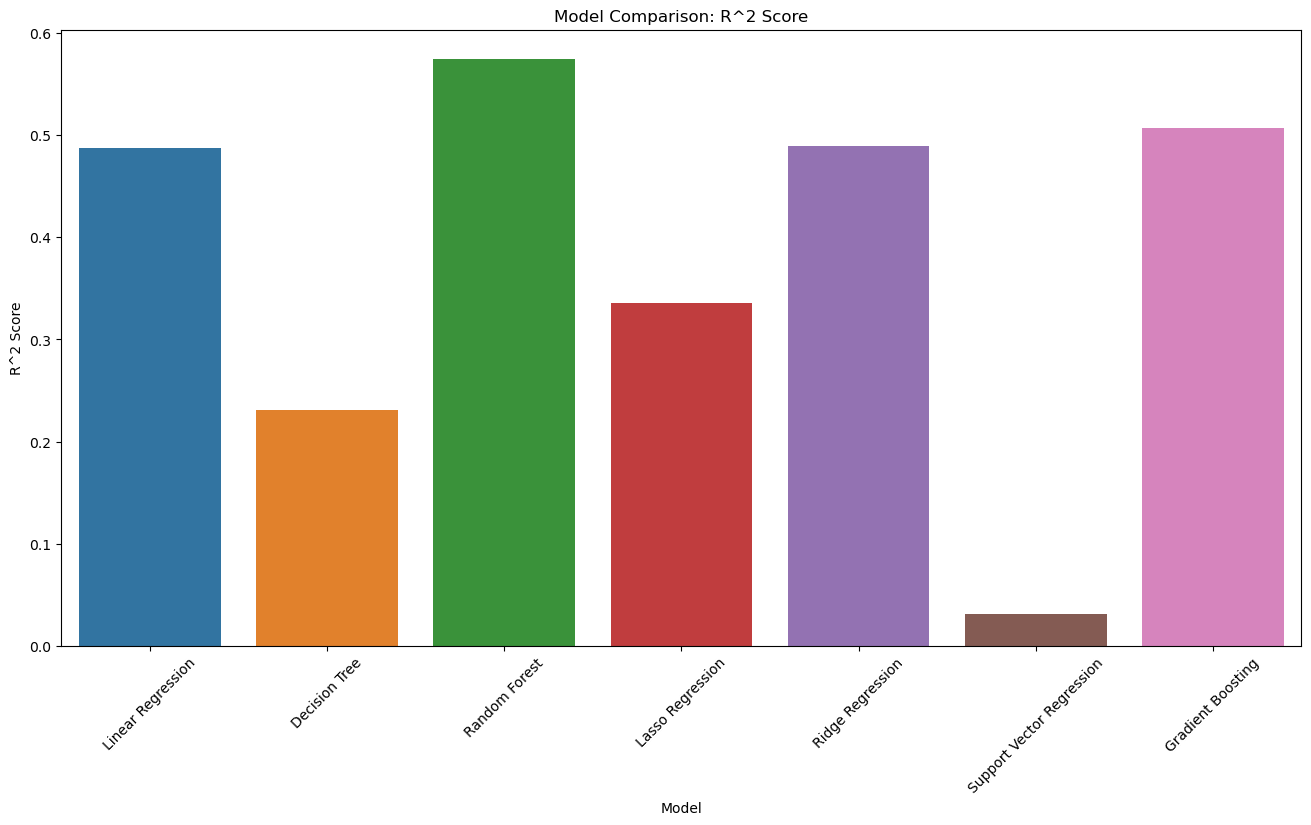

In [66]:
# Create a DataFrame for comparison
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Lasso Regression", "Ridge Regression",
              "Support Vector Regression", "Gradient Boosting"],
    "Mean Squared Error": [
        mean_squared_error(y_test, lr_predictions),
        mean_squared_error(y_test, dt_predictions),
        mean_squared_error(y_test, rf_predictions),
        mean_squared_error(y_test, lasso_predictions),
        mean_squared_error(y_test, ridge_predictions),
        mean_squared_error(y_test, svr_predictions),
        mean_squared_error(y_test, gb_predictions),
        # mean_squared_error(y_test, xgb_predictions)
    ],
    "R^2 Score": [
        r2_score(y_test, lr_predictions),
        r2_score(y_test, dt_predictions),
        r2_score(y_test, rf_predictions),
        r2_score(y_test, lasso_predictions),
        r2_score(y_test, ridge_predictions),
        r2_score(y_test, svr_predictions),
        r2_score(y_test, gb_predictions),
        # r2_score(y_test, xgb_predictions)
    ]
})

# Display results
print(results)

# Plot comparison
plt.figure(figsize = (16, 8))
sns.barplot(data = results, x = 'Model', y = 'R^2 Score')
plt.title('Model Comparison: R^2 Score')
plt.xticks(rotation = 45)
plt.show()